In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from itertools import product
import itertools
import statsmodels.api as sm
from statsmodels.formula.api import ols


data = pd.read_csv(r"C:\Users\Superuser\Desktop\Datasets\insurance.csv")

In [64]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

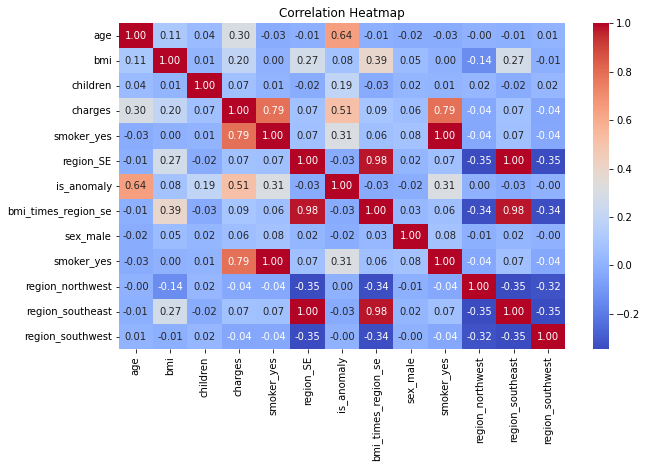

charges                1.000000
smoker_yes             0.787251
smoker_yes             0.787251
is_anomaly             0.514428
age                    0.299008
bmi                    0.198341
bmi_times_region_se    0.091194
region_SE              0.073982
region_southeast       0.073982
children               0.067998
sex_male               0.057292
region_northwest      -0.039905
region_southwest      -0.043210
Name: charges, dtype: float64


In [132]:
data_encoded = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)

correlation_matrix = data_encoded.corr()

correlation_with_charges = correlation_matrix['charges'].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

print(correlation_with_charges)


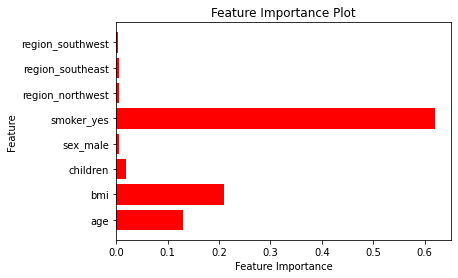

In [53]:
from sklearn.ensemble import RandomForestRegressor

X = data_encoded.drop(columns='charges', axis=1)

y = data_encoded['charges']



model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)


feature_importances = model.feature_importances_

feature_names = X.columns
plt.barh(feature_names, feature_importances, color='red')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()


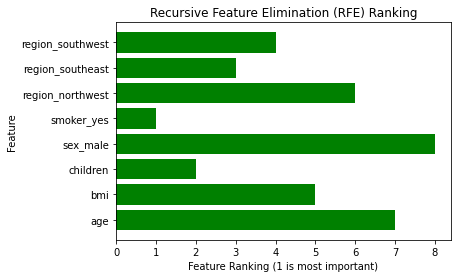

In [55]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()

selector = RFE(model, n_features_to_select=1, step=1)


selector = selector.fit(X, y)


feature_ranking = selector.ranking_


plt.barh(feature_names, feature_ranking, color='green')
plt.xlabel('Feature Ranking (1 is most important)')
plt.ylabel('Feature')
plt.title('Recursive Feature Elimination (RFE) Ranking')
plt.show()


In [65]:
from scipy.stats import shapiro

charges = data['charges']

statistic, p_value = shapiro(charges)

print("Shapiro-Wilk Test:")
print(f"Test Statistic = {statistic:.4f}, p-value = {p_value:.4f}")


alpha = 0.05
if p_value > alpha:
    print("The data appears to be normally distributed (fail to reject the null hypothesis)")
else:
    print("The data does not appear to be normally distributed (reject the null hypothesis)")


Shapiro-Wilk Test:
Test Statistic = 0.8147, p-value = 0.0000
The data does not appear to be normally distributed (reject the null hypothesis)


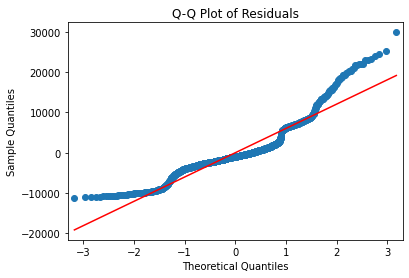

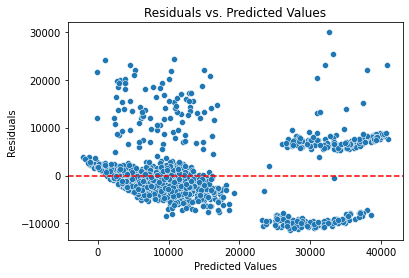

In [66]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt


formula = 'charges ~ age + bmi + children + smoker + region'
model = smf.ols(formula, data=data).fit()

residuals = model.resid

sm.qqplot(residuals, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()


sns.scatterplot(x=model.predict(), y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals vs. Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()


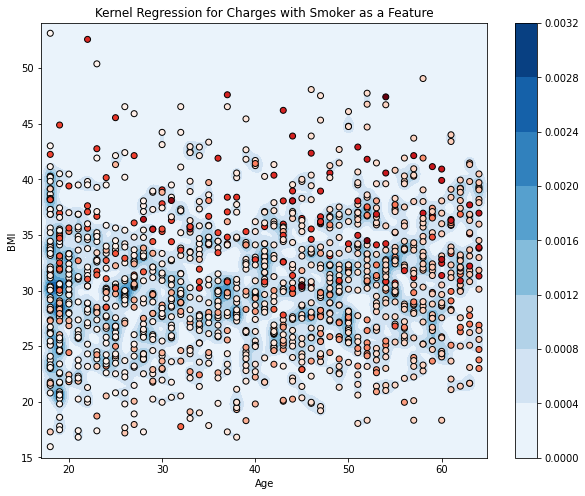

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity


data['smoker_yes'] = (data['smoker'] == 'yes').astype(int)

X = data[['age', 'bmi', 'smoker_yes']].values
y = data['charges'].values

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

kde = KernelDensity(bandwidth=0.5, kernel='gaussian')
kde.fit(X)

Z = np.exp(kde.score_samples(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel())]))
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues)
plt.colorbar()
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Reds, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Kernel Regression for Charges with Smoker as a Feature')
plt.show()


The contour plot displays the estimated density of 'charges' on a grid defined by 'age' and 'bmi.' The contour lines represent different levels of density, with darker areas indicating higher density (higher probability of occurrence). The color of the contours reflects the density level. 

Contour Plot	
- Darker regions indicate higher probability of higher healthcare charges. - Lighter regions indicate lower charges.

Scatter Plot	
- Actual data points showing the relationship between 'age,' 'bmi,' 'charges,' and 'smoker_yes.'

Effect of 'smoker_yes'	
- Observe how the smoking status affects the estimated density and distribution of charges.

Data Distribution	
- Compare the estimated density with actual data points to assess model performance and fit.

In [84]:
print(correlation_with_charges), data.info()

charges             1.000000
smoker_yes          0.787251
age                 0.299008
bmi                 0.198341
region_southeast    0.073982
children            0.067998
sex_male            0.057292
region_northwest   -0.039905
region_southwest   -0.043210
Name: charges, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1338 non-null   int64  
 1   sex         1338 non-null   object 
 2   bmi         1338 non-null   float64
 3   children    1338 non-null   int64  
 4   smoker      1338 non-null   object 
 5   region      1338 non-null   object 
 6   charges     1338 non-null   float64
 7   smoker_yes  1338 non-null   int32  
dtypes: float64(2), int32(1), int64(2), object(3)
memory usage: 78.5+ KB


(None, None)

In [88]:
data['region_SE'] = (data['region'] == 'southeast').astype(int)

## Baseline RMSE R^2

In [96]:
X = data[['smoker_yes', 'age', 'bmi', 'children' ]]
y = data['charges']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)


y_pred = rf_regressor.predict(X_test)


mse = mean_squared_error(y_test, y_pred)

rmse = mse**(1/2)
r2 = r2_score(y_test, y_pred)

print(f"Root-Mean Squared Error (MSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Root-Mean Squared Error (MSE): 4675.03
R-squared (R2): 0.86


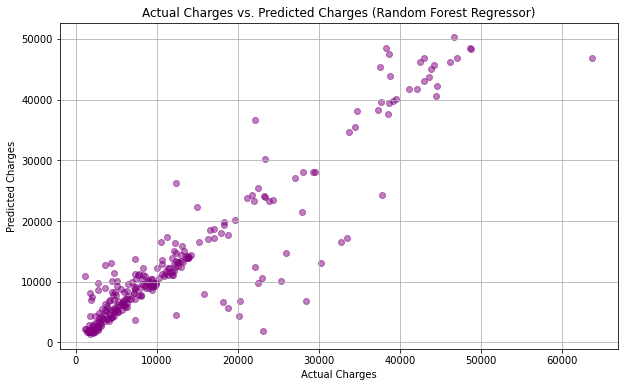

In [98]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='purple')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual Charges vs. Predicted Charges (Random Forest Regressor)")
plt.grid(True)
plt.show()


Identify Outliers

In [103]:
Q1 = data['charges'].quantile(0.25)
Q3 = data['charges'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

outliers = data[(data['charges'] < lower_bound) | (data['charges'] > upper_bound)]

print(outliers)


      age     sex     bmi  children smoker     region      charges  \
543    54  female  47.410         0    yes  southeast  63770.42801   
577    31  female  38.095         1    yes  northeast  58571.07448   
819    33  female  35.530         0    yes  northwest  55135.40209   
1146   60    male  32.800         0    yes  southwest  52590.82939   
1230   52    male  34.485         3    yes  northwest  60021.39897   
1300   45    male  30.360         0    yes  southeast  62592.87309   

      smoker_yes  region_SE  is_anomaly  
543            1          1           1  
577            1          0           1  
819            1          0           1  
1146           1          0           1  
1230           1          0           1  
1300           1          1           1  


Remove Outliers

In [106]:
data_cleaned = data[~data.index.isin(outliers.index)]


In [107]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = data_cleaned[['smoker_yes', 'age', 'bmi', 'children' ]]
y = data_cleaned['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

rmse = mse**(1/2)
r2 = r2_score(y_test, y_pred)

print(f"Root-Mean Squared Error (MSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Root-Mean Squared Error (MSE): 4327.12
R-squared (R2): 0.87


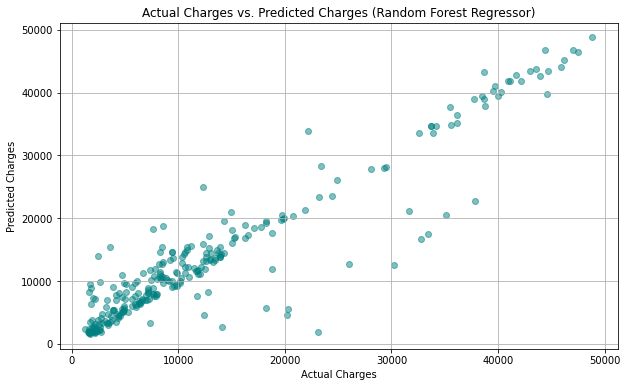

In [108]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual Charges vs. Predicted Charges (Random Forest Regressor)")
plt.grid(True)
plt.show()


## Grid Parameter search

In [122]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [1000, 2000 ],
    'max_depth': [4,8],
    'min_samples_split': [2,3],
    'min_samples_leaf': [4, 6,8]
}

rf_regressor = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_rf_model = grid_search.best_estimator_

y_pred = best_rf_model.predict(X_test)


Best Hyperparameters: {'max_depth': 4, 'min_samples_leaf': 6, 'min_samples_split': 2, 'n_estimators': 1000}


In [131]:
X_regression = data_cleaned[['smoker_yes', 'age', 'bmi', 'children']]
y_regression = data_cleaned['charges']


rf_regressor = RandomForestRegressor(n_estimators=1000, max_depth=4, min_samples_split=2, min_samples_leaf=6, random_state=42)

X_train_regression, X_test_regression, y_train_regression, y_test_regression = train_test_split(
    X_regression, y_regression, test_size=0.2, random_state=42)


rf_regressor.fit(X_train_regression, y_train_regression)


y_pred_regression = rf_regressor.predict(X_test_regression)


mse_regression = mean_squared_error(y_test_regression, y_pred_regression)
rmse_regression = np.sqrt(mse_regression)
r2_regression = r2_score(y_test_regression, y_pred_regression)

print(f"Regression - Root-Mean Squared Error (RMSE): {rmse_regression:.2f}")
print(f"Regression - R-squared (R2): {r2_regression:.2f}")


X_classification = data_cleaned[['smoker_yes', 'age', 'bmi', 'children']]
y_classification = (data_cleaned['charges'] > 15000).astype(int)  


rf_classifier = RandomForestClassifier(n_estimators=1000, max_depth=4, min_samples_split=2, min_samples_leaf=6, random_state=42)


X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=42)

rf_classifier.fit(X_train_classification, y_train_classification)

y_pred_classification = rf_classifier.predict(X_test_classification)

classification_rep = classification_report(y_test_classification, y_pred_classification)
print("Classification Report:\n", classification_rep)

num_folds = 5
f1_scores = cross_val_score(rf_classifier, X_classification, y_classification, cv=num_folds, scoring='f1')

for i, f1 in enumerate(f1_scores):
    print(f"Fold {i+1}: F1 Score = {f1:.2f}")


mean_f1 = np.mean(f1_scores)
print(f"Mean F1 Score across {num_folds} folds: {mean_f1:.2f}")


Regression - Root-Mean Squared Error (RMSE): 3879.37
Regression - R-squared (R2): 0.90
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       196
           1       0.97      0.85      0.90        71

    accuracy                           0.95       267
   macro avg       0.96      0.92      0.93       267
weighted avg       0.95      0.95      0.95       267

Fold 1: F1 Score = 0.87
Fold 2: F1 Score = 0.79
Fold 3: F1 Score = 0.83
Fold 4: F1 Score = 0.86
Fold 5: F1 Score = 0.86
Mean F1 Score across 5 folds: 0.84
